Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
df = pd.read_excel('/Users/yoshii/Desktop/Retail_Sales.xlsx')

Data Cleaning

See dataframe

In [2]:
# first 5 rows
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# see dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


Find Duplicate row

In [4]:
# duplicated rows
df.duplicated().sum()

np.int64(0)

Rename column

In [5]:
# convert to lowercase format and space replace with (_)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

Find Missing Data

In [6]:
# see the null
df.isna().sum()

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

Change Data type

In [7]:
# change Product Category data type
df['product_category'] = df['product_category'].astype('category')
df.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                      object
age                          int64
product_category          category
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object

Adding Age Group Column

In [8]:
# binning Age 
age_bins = [0, 18, 25, 35, 50, 100]
age_range = ['0-18', '19-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['age'], bins = age_bins, labels = age_range)
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,26-35


Adding Month Column

In [9]:
# add 'month' column and extract month from date
df['month'] = df['date'].dt.month
df['month']

0      11
1       2
2       1
3       5
4       5
       ..
995     5
996    11
997    10
998    12
999     4
Name: month, Length: 1000, dtype: int32

Explaintory Data Analysis

Data Virsualization

Price per unit by Gender

Text(0.5, 1.0, 'Price per unit by Gender')

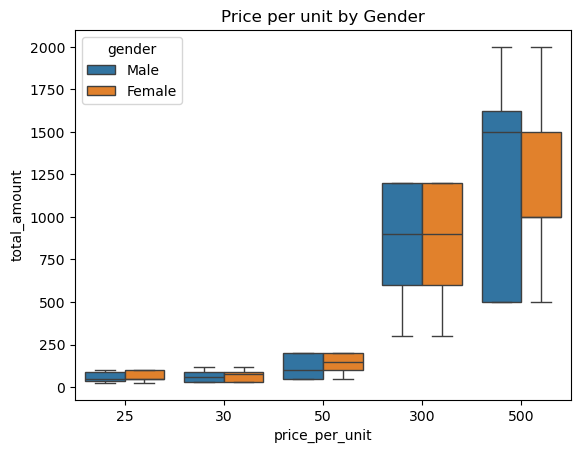

In [10]:
# box plot
sns.boxplot(x='price_per_unit', y='total_amount', hue='gender', data=df)
plt.title('Price per unit by Gender')

Product Category purchased by Gender

Text(0.5, 1.0, 'Product Category purchased by Gender')

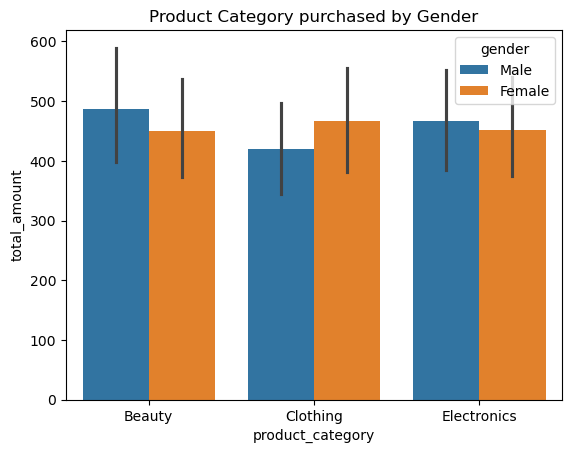

In [11]:
# bar plot
sns.barplot(x='product_category', y='total_amount', hue= 'gender', data=df)
plt.title('Product Category purchased by Gender')

Product Category purchased by Age group

Text(0, 0.5, 'Quantity Purchased')

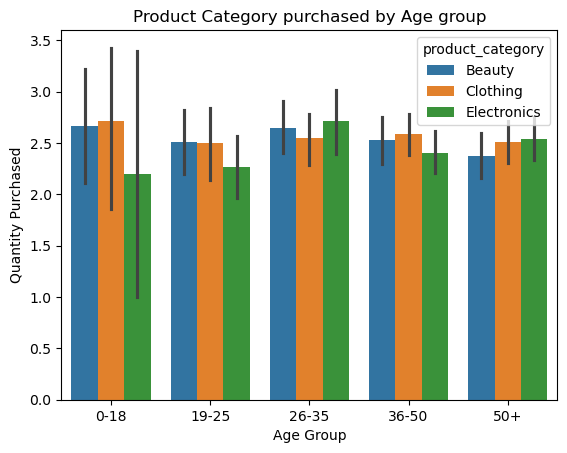

In [12]:
# bar plot
sns.barplot(x='Age Group', y='quantity', hue= 'product_category', data=df)
plt.title('Product Category purchased by Age group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')

Product Category purchased overtime

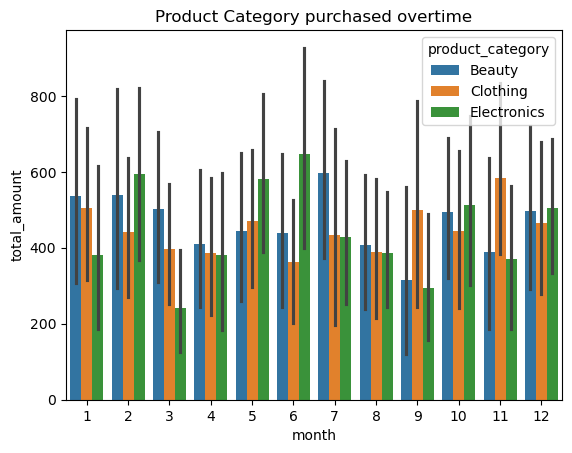

In [13]:
# bar plot
sns.barplot(x='month', y='total_amount', hue= 'product_category', data=df)
plt.title('Product Category purchased overtime')
plt.show()

Transaction Frequency Over Months

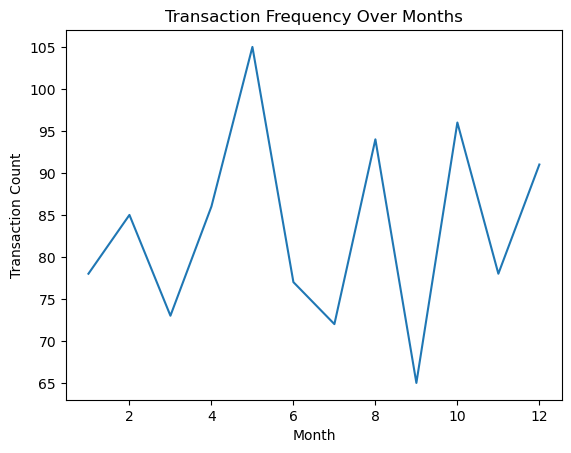

In [14]:
# line plot
transaction_count = df.groupby('month')['transaction_id'].count()
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()